## Heart Failure Prediction Dataset

**Objectif** : Identifier une possible défaillance cardiaque en fonction des rensignements du patient 

#### Definition de toutes les variables
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

### Packages necessaire: 

In [1]:
#! pip install seaborn
#! pip install pydotplus

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import matplotlib.pyplot as plt
import pydotplus
%matplotlib inline
from six import StringIO
from IPython.display import Image  
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics #import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

**Recuperation des données**

In [3]:
data = pd.read_csv("heart.csv") # data = base de données receuilli sur les patients 

**Aperçu des données**

In [4]:
data.head(5)


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
# Taille du jeu des données 
# Nombre des lignes :
print("Ce jeu de données possèdent")
print(f"--> {data.shape[0]} lignes")
# Nombre des colones 
print(f"--> {data.shape[1]} colones")

(918, 12)

In [5]:
prinnt("Les valeurs par colones:")
data.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

**_Toutes les colones sont remplies, donc il n'y a pas de valeurs manquantes_** 

In [13]:
type_dct = {str(k): list(v) for k, v in data.groupby(data.dtypes, axis=1)}
type_dct

{'int64': ['Age',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'MaxHR',
  'HeartDisease'],
 'float64': ['Oldpeak'],
 'object': ['Sex',
  'ChestPainType',
  'RestingECG',
  'ExerciseAngina',
  'ST_Slope']}

In [24]:
data["RestingECG"].value_counts().to_frame()

RestingECG
Normal         552
LVH            188
ST             178

In [25]:
data["ST_Slope"].value_counts().to_frame()

ST_Slope
Flat       460
Up         395
Down        63

In [26]:
data["ChestPainType"].value_counts().to_frame()

ChestPainType
ASY            496
NAP            203
ATA            173
TA              46

In [28]:
data["ExerciseAngina"].value_counts().to_frame()

ExerciseAngina
N             547
Y             371

In [15]:
data.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

**Visualition des données**

<Figure size 1500x1000 with 0 Axes>

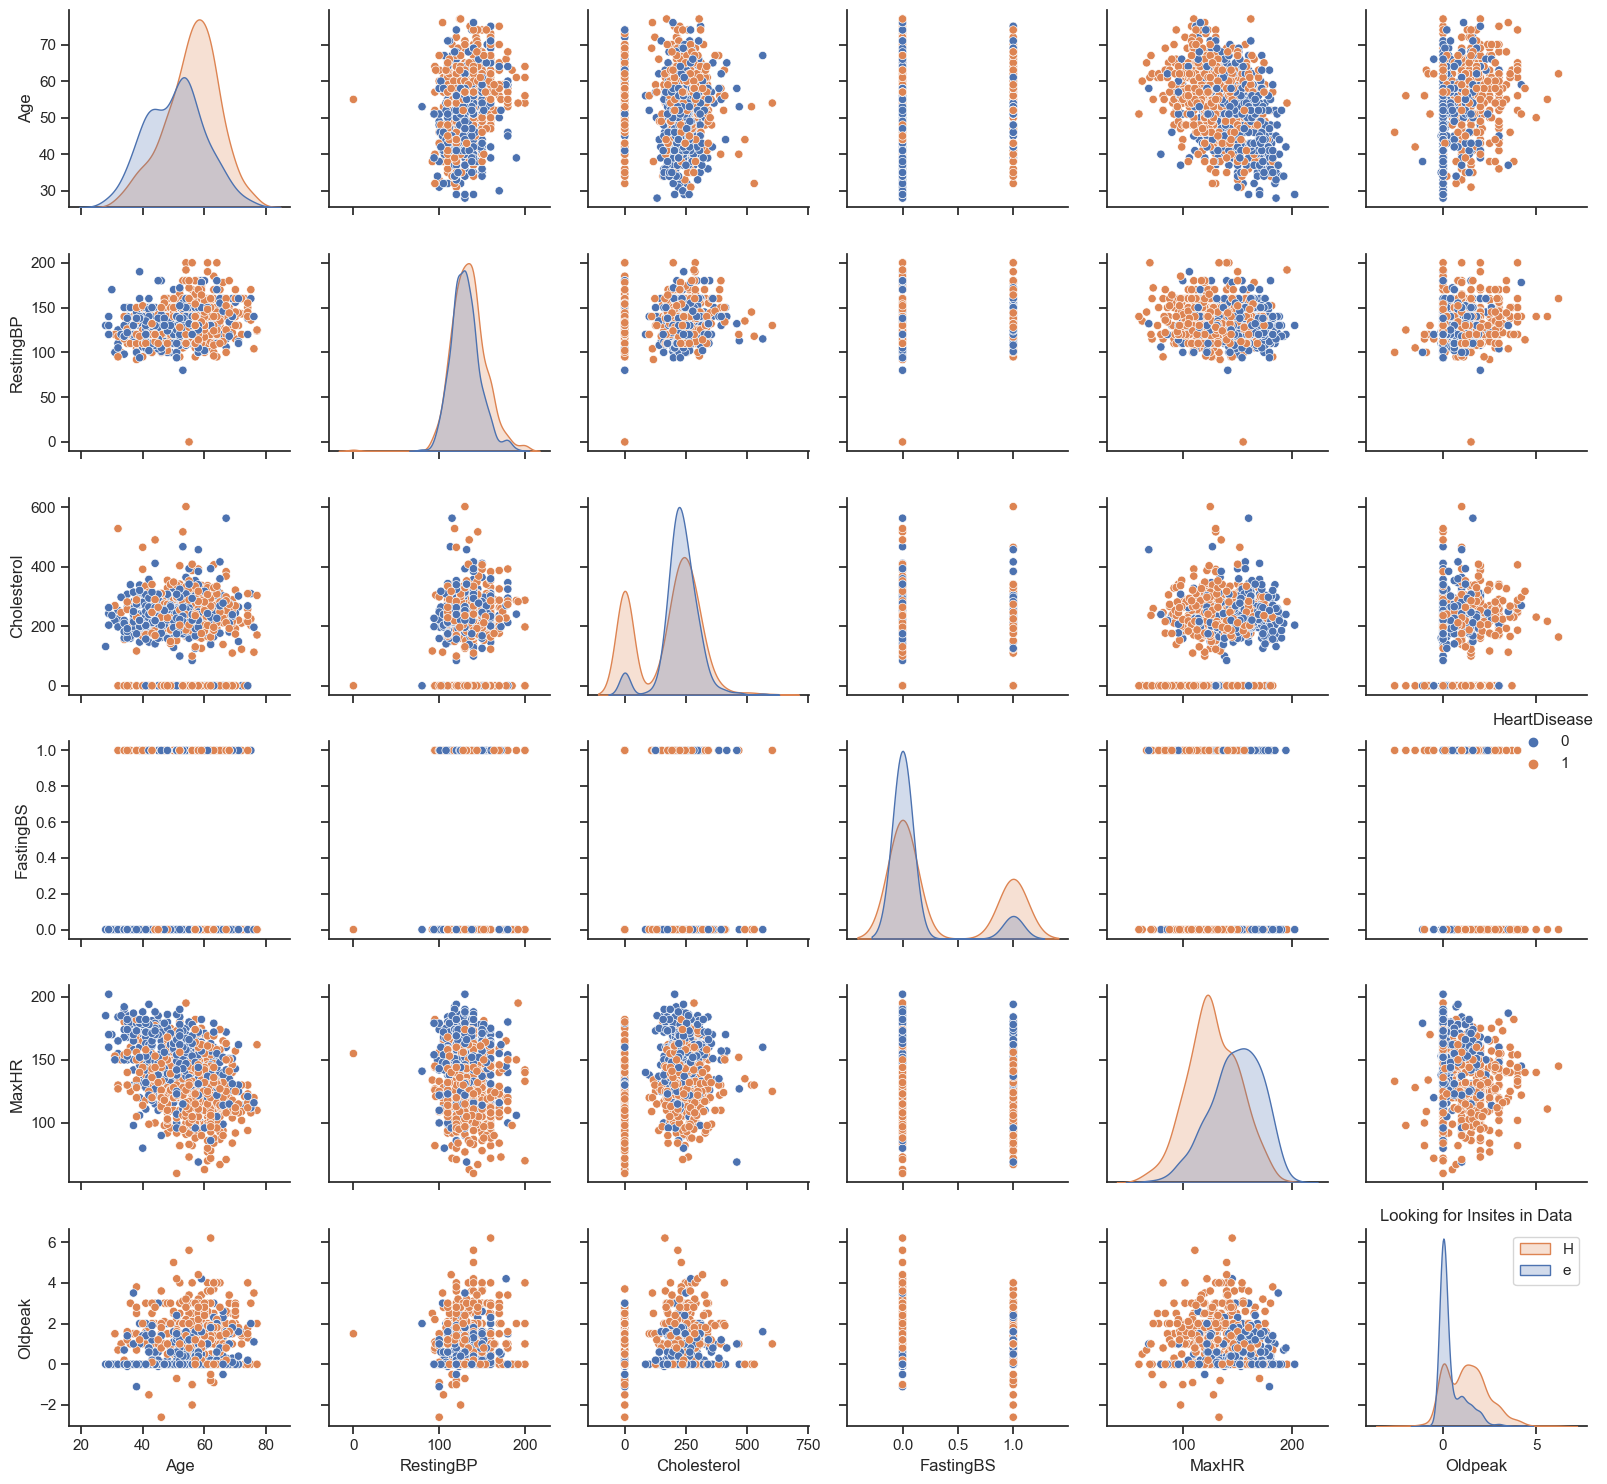

In [8]:
sns.set_theme(style="ticks")
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.show();

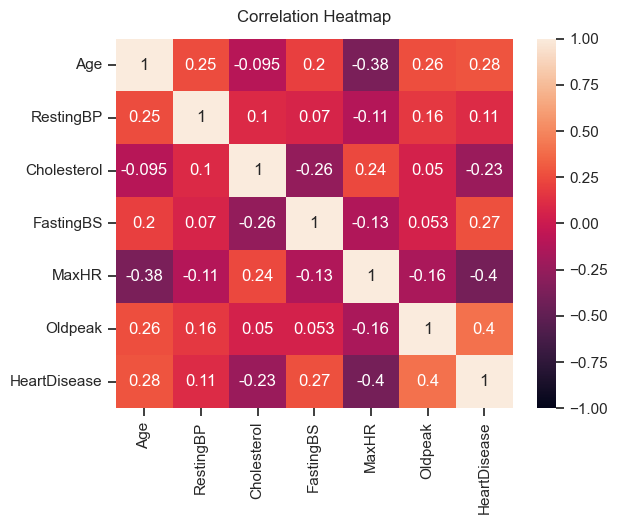

In [9]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**_les variables numeriques semblent assez independantes les unes des autres_**

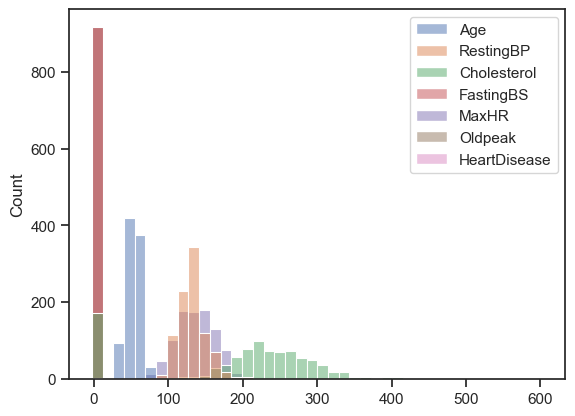

In [10]:
sns.histplot(data);

'ExerciseAngina'

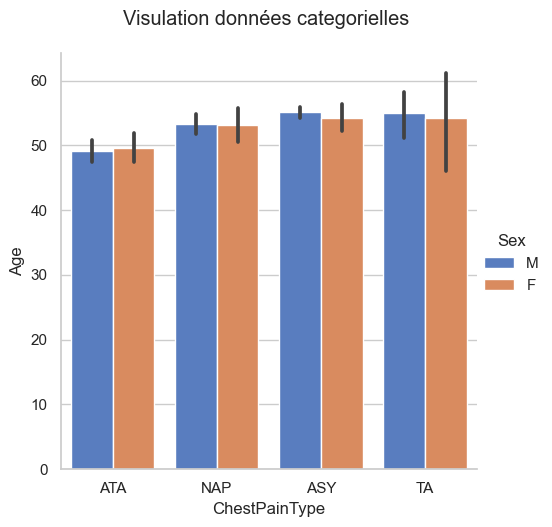

In [38]:
#Visualisation des données 
viz_cat_1 = sns.catplot(data=data, x="ChestPainType", y="Age",kind="bar",hue="Sex")
viz_cat_1.fig.suptitle("Visulation données categorielles", y=1.05); "ExerciseAngina"

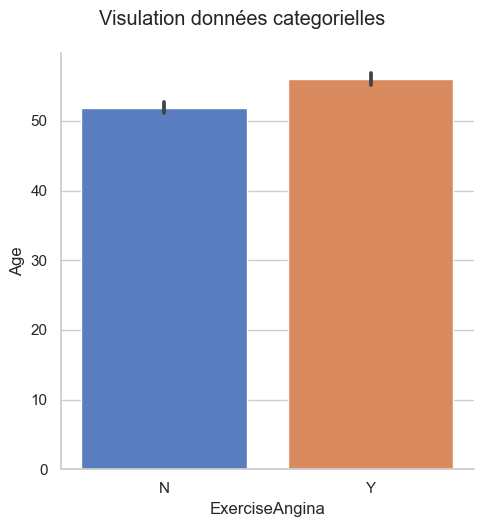

In [107]:
#Visualisation des données 
viz_cat_1 = sns.catplot(data=data, x="ExerciseAngina", y="Age",kind="bar")
viz_cat_1.fig.suptitle("Visulation données categorielles", y=1.05); 

In [36]:
#Visualisation des données 
viz_cat_1 = sns.catplot(data=data, x="ST_Slope", y="Age",kind="bar",hue="Sex")
viz_cat_1.fig.suptitle("Visulation données categorielles", y=1.05); 

In [12]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show();


In [ ]:
data["Choles"]

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot();

### Preprocessing :
    
    -> Cible : Heart Disease 
    -> Variables: les onze colones restantes
    -> instantiation de la classe de preprocessing pour lancer la démarche de fitting et scaling du model.
    -> entraînement du model sur les features d’entraînement (toujours)
    -> mise à l'échelle des features (données présentes en X dans le dataset d'étude)


In [15]:
#extraction de la cible
y=data["HeartDisease"]
X=data.drop(["HeartDisease"],axis=1)

### _Premier Model: Arbre de decision_

In [64]:
#Transformation des variables categorielle
X_dumies = pd.get_dummies(X)

In [65]:
#séparation des données : données d'entrainement & données de test 
X_train,X_test,y_train,y_test = train_test_split(X_dumies, y, test_size=0.30, random_state=100)

In [96]:
model = tree.DecisionTreeClassifier(max_depth=4)


In [97]:
#entrainement du modele 
modelfit = model.fit(X_train,y_train)
#le score du modèle: 
print(f"Première itération sans normalisation des variables a un score= {modelfit.score(X_test,y_test)}")
#determine si le patient aura une defaillance cardiaque  
y_pred = modelfit.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Première itération sans normalisation des variables a un score= 0.8260869565217391
Accuracy: 0.8260869565217391


In [98]:
#matrice de confusion 
confMatrix= confusion_matrix(y_test,y_pred,normalize='pred')
df_CM = pd.DataFrame(confMatrix,index=["Pas de defaillance cardiaque","Defaillance cardiaquee"],columns=["Pas de defaillance cardiaque","Defaillance cardiaque"])

#visualisation de la matrice de confusion 
plt.figure(figsize=(6,6))
sns.heatmap(df_CM,annot=True)
plt.title("Confusion matrix");
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();


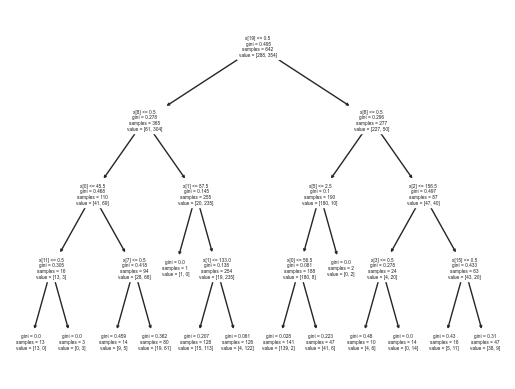

In [99]:
#Graphe 
tree.plot_tree(modelfit);

In [100]:
feature_cols = X_dumies.columns

In [101]:
#feature_cols

In [102]:
dot_data = StringIO()
export_graphviz(modelfit, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### _Second Model: Plus proche voisin_

In [104]:
neigh_model = KNeighborsClassifier(3)

#entrainement du modele 
neigh_model_fit = neigh_model.fit(X_train,y_train)

#determine si le patient aura une defaillance cardiaque  
y_pred_knn = neigh_model_fit.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.717391304347826


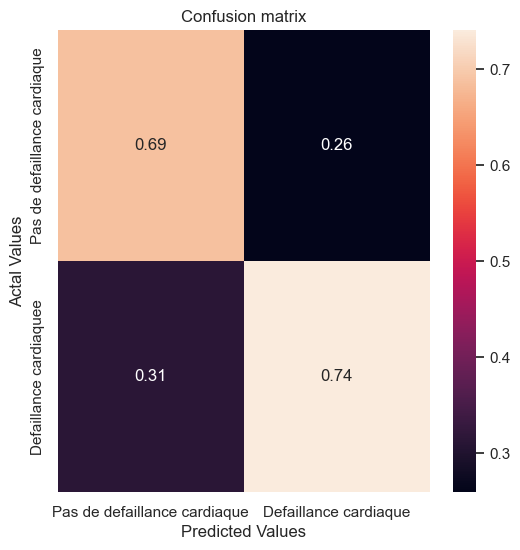

In [105]:
#matrice de confusion 
confMatrix_knn= confusion_matrix(y_test,y_pred_knn,normalize='pred')
df_CM_knn = pd.DataFrame(confMatrix_knn,index=["Pas de defaillance cardiaque","Defaillance cardiaquee"],columns=["Pas de defaillance cardiaque","Defaillance cardiaque"])

#visualisation de la matrice de confusion 
plt.figure(figsize=(6,6))
sns.heatmap(df_CM_knn,annot=True)
plt.title("Confusion matrix");
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();
